# Preparation for qiskit exam
Objectives:
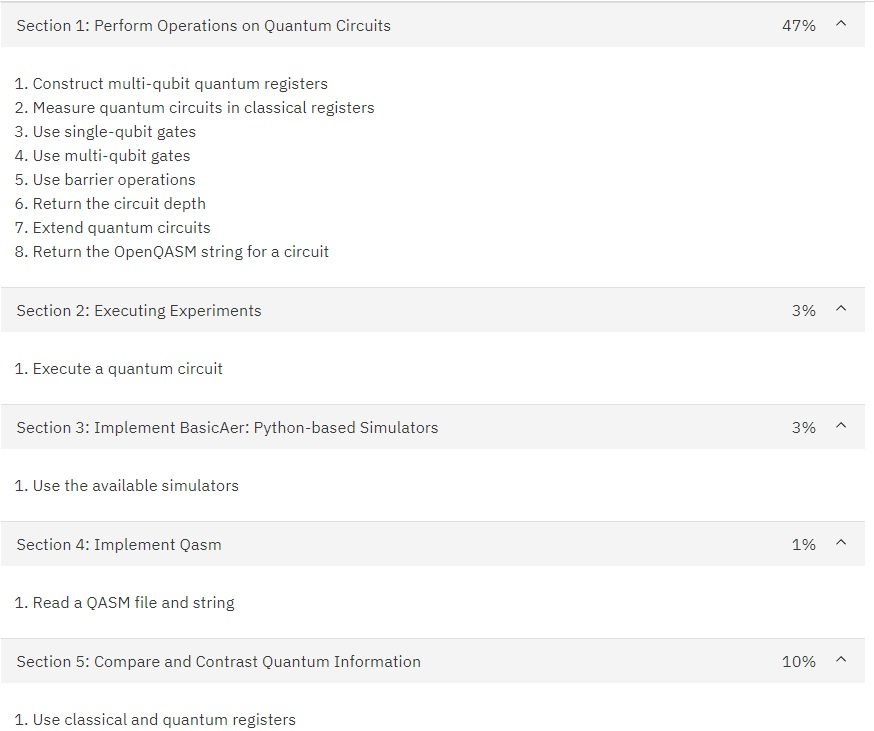

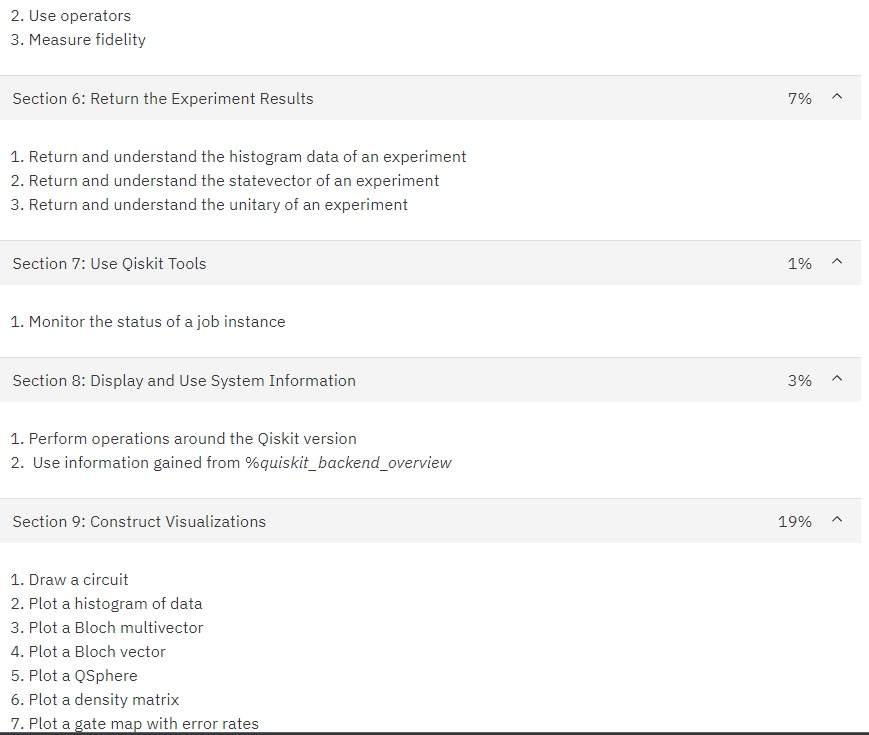

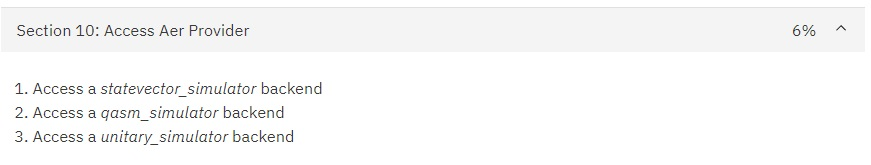

The outline of the document follows this structure

## 1. Perform operations on quantum circuits

1. Construct multi-qubit quantum registers
2. Measure quantum circuits in classical registers
3. Use single-qubit gates
  - list of gates
4. Use multi-qubit gates
  - list of gates
5. Use barrier operations
6. Return the circuit depth
7. Extend quantum circuits
8. Return the OpenQASM string for a circuit

In [1]:
# Construct multi-qubit quantum registers
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
qr = QuantumRegister(3, "qubit")
cr = ClassicalRegister(3, "bit")
qc = QuantumCircuit(qr,cr)

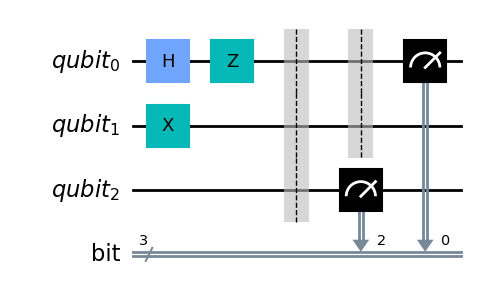

In [2]:
# measure quantum circuits in classical registers and barriers
# construct one qubit circuit and barriers
qc.h(0)
qc.x(1)
qc.z(0)
qc.barrier() # all
qc.barrier([0,1]) # only 0,1
qc.measure([0,2], [0,2]) # measure only 0,2 -> 0,2
qc.draw('mpl')

In [3]:
# return depth of circuit
# caution: measurements are counted as well!
print(qc.depth())

3


In [ ]:
# extend quantum circuits

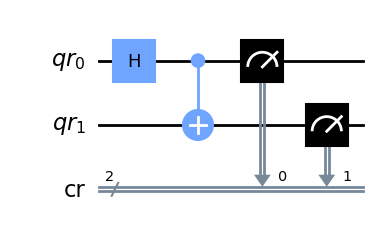

In [59]:
# write qasm for circuit
# create sample circuit to compare
qc_bell = QuantumCircuit(2,2)
qc_bell.h(0)
qc_bell.cx(0,1)
qc_bell.measure([0,1], [0,1])

#now try with qasm
qc_bell_qasm = QuantumCircuit().from_qasm_str('''OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg qr[2];\ncreg cr[2];\nh qr[0]\n;cx qr[0], qr[1];\nmeasure qr -> cr;''')
qc_bell_qasm.draw('mpl')

In [62]:
# test equality
from qiskit.quantum_info import Operator

# remove measurements
qc_bell.remove_final_measurements()
qc_bell_qasm.remove_final_measurements()

Op1 = Operator(qc_bell)
Op2 = Operator(qc_bell_qasm)

Op1.equiv(Op2)

True

## 2. Executing experiments

In [3]:
# execute a quantum circuit
from qiskit import execute
from qiskit import QuantumCircuit
from qiskit import BasicAer

qc1 = QuantumCircuit(1)
qc1.h(0)

qc2 = QuantumCircuit(1)
qc2.x(0)

backend = BasicAer.get_backend("statevector_simulator")
job = execute([qc1, qc2], backend)

result = job.result()
state_a = result.get_statevector(qc1)
state_b = result.get_statevector(qc2)

print(state_a)
print(state_b)

[0.70710678+0.j 0.70710678+0.j]
[0.+0.j 1.+0.j]


## 3. Implement BasicAer: Python based simulators

In [5]:
#use available simulators
from qiskit import BasicAer

BasicAer.backends()

[<QasmSimulatorPy('qasm_simulator')>,
 <StatevectorSimulatorPy('statevector_simulator')>,
 <UnitarySimulatorPy('unitary_simulator')>]

In [6]:
from qiskit import QuantumCircuit
qc_basic = QuantumCircuit(2,2)
qc_basic.h(0)
qc_basic.cx(0,1)
qc_basic.measure([0,1], [0,1])

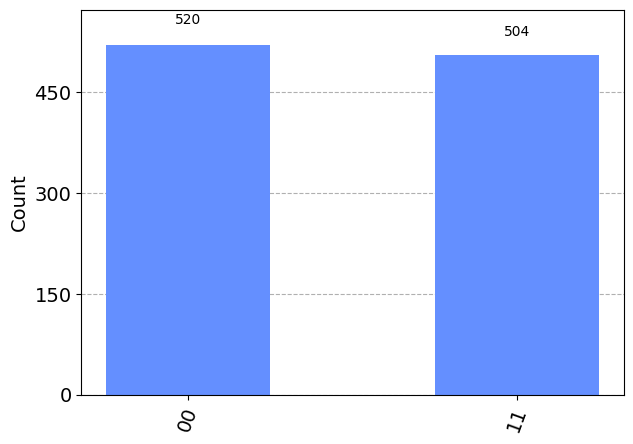

In [8]:
# use qasm_simulator
from qiskit import execute
from qiskit.visualization import plot_histogram

qasm_backend = BasicAer.get_backend("qasm_simulator")
job = execute(qc_basic, qasm_backend)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [11]:
# use statevector_simulator
from qiskit import execute

statevec_backend = BasicAer.get_backend("statevector_simulator")
job = execute(qc_basic, statevec_backend)
result = job.result()
state_basic = result.get_statevector(qc_basic)
print(state_basic)

[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


In [16]:
# use unitary
from qiskit import execute
from qiskit import QuantumCircuit
qc_unitary = QuantumCircuit(2,2)
qc_unitary.h(0)
qc_unitary.cx(0,1)

unitary_backend = BasicAer.get_backend("unitary_simulator")
job = execute(qc_unitary, unitary_backend)
result = job.result()
unitary_basic = result.get_unitary(qc_unitary)
print(unitary_basic)

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]]


In [30]:
from qiskit import Aer, QuantumCircuit, assemble
from qiskit.visualization import array_to_latex
from numpy import pi

u_sim = Aer.get_backend('unitary_simulator')
qc = QuantumCircuit(2)

# --------- A ------------
qc.crz(pi,0,1)
qc.cp(pi,0,1)

# --------- B ------------
#qc.cz(0,1)
#qc.cp(pi,0,1)

# --------- C ------------
#qc.crz(pi,0,1)
#qc.crz(-pi,0,1)

# --------- D ------------
#qc.cz(0,1)
#qc.cz(1,0)


qobj = assemble(qc)
unitary = execute(qc,u_sim).result().get_unitary()

# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

## 4. Implement Qasm

In [3]:
#read qasm code
# sample circuit
from qiskit import QuantumCircuit

qc_qasm = QuantumCircuit(2,2)
qc_qasm.h(0)
qc_qasm.barrier()
qc_qasm.cx(0,1)
qc_qasm.measure([0,1], [0,1])
qc_qasm.draw('mpl')

print(qc_qasm.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
barrier q[0],q[1];
cx q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];



## 5. Compare and contrast quantum information

In [36]:
# use classical and quantum registers
from qiskit import QuantumRegister, ClassicalRegister
qr = QuantumRegister(3, name="blubb")
cr = ClassicalRegister(3, name="classic")

print(qr.qasm())
print(cr.qasm())

qreg blubb[3];
creg classic[3];


C:\Users\maussner\AppData\Local\Temp\ipykernel_9020\3859367085.py:6: DeprecationWarning: Register.qasm() is deprecated since Terra 0.23, as correct exporting to OpenQASM 2 is the responsibility of a larger exporter; it cannot safely be done on an object-by-object basis without context. No replacement will be provided, because the premise is wrong.
  print(qr.qasm())
C:\Users\maussner\AppData\Local\Temp\ipykernel_9020\3859367085.py:7: DeprecationWarning: Register.qasm() is deprecated since Terra 0.23, as correct exporting to OpenQASM 2 is the responsibility of a larger exporter; it cannot safely be done on an object-by-object basis without context. No replacement will be provided, because the premise is wrong.
  print(cr.qasm())


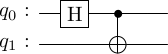

In [37]:
from qiskit import QuantumCircuit
qc_bell = QuantumCircuit(2)
qc_bell.h(0)
qc_bell.cx(0,1)
qc_bell.draw('latex')

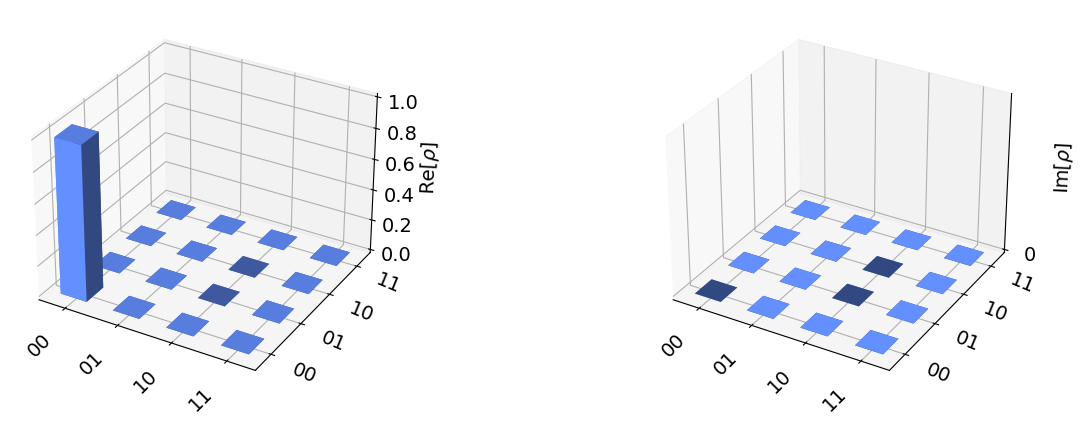

In [40]:
# use operators
from qiskit.visualization import plot_state_city
from qiskit.quantum_info import Statevector
sv = Statevector.from_label("00") # initial state of sv
sv.evolve(qc_bell) # now run qc_bell on initial state "00"
plot_state_city(sv)

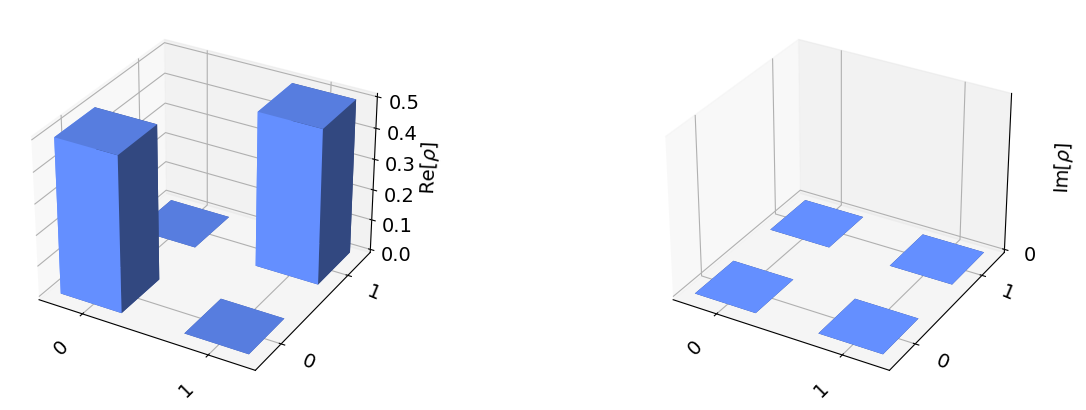

In [43]:
# partial trace q0, q1
from qiskit.quantum_info import DensityMatrix, partial_trace
from qiskit.visualization import plot_state_city
d = DensityMatrix(qc_bell)
p0 = partial_trace(d, [1])
p1 = partial_trace(d, [0])
plot_state_city(p0)

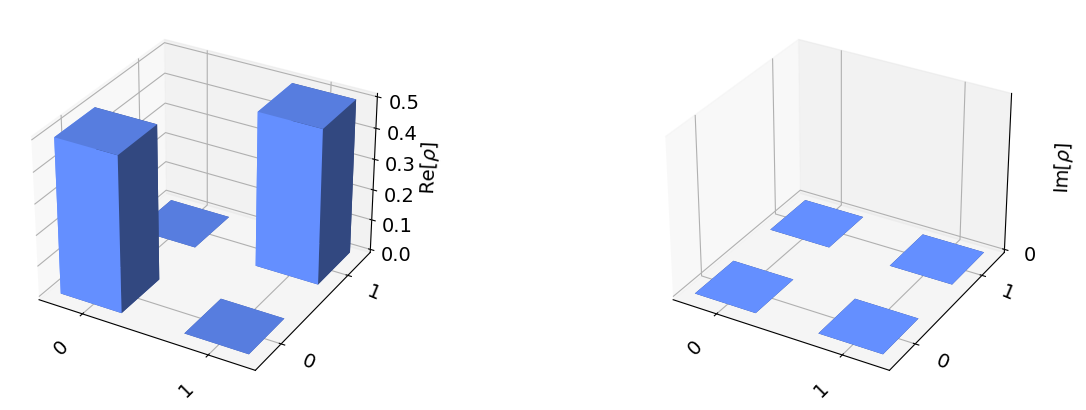

In [44]:
plot_state_city(p1)

In [98]:
print(d)

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]],
              dims=(2, 2))


In [47]:
# operators by matrix
from qiskit.quantum_info import Operator
XX = Operator([[0,0,0,1], [1,0,0,0], [0,0,1,0], [0,1,0,0]])
print(XX.input_dims(), " , ", XX.output_dims())

(2, 2)  ,  (2, 2)


In [50]:
# convert classes to operators
from qiskit.quantum_info.operators import Operator, Pauli
pauliXX = Pauli('XX')
opXX = Operator(pauliXX)
print(opXX)

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [54]:
# convert gates, instructions to operators
from qiskit.extensions import XGate
opX = Operator(XGate())
print(opX)

opBell = Operator(qc_bell)
opInst = Operator()

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [63]:
# calculating with operators
opXX2 = opX.tensor(opX)
print(opXX2)

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


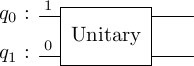

In [76]:
# operators in circuits
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_city
from qiskit.quantum_info import Statevector
qcXX = QuantumCircuit(2)
qcXX.append(opXX2, [1,0])
qcXX.draw('latex')

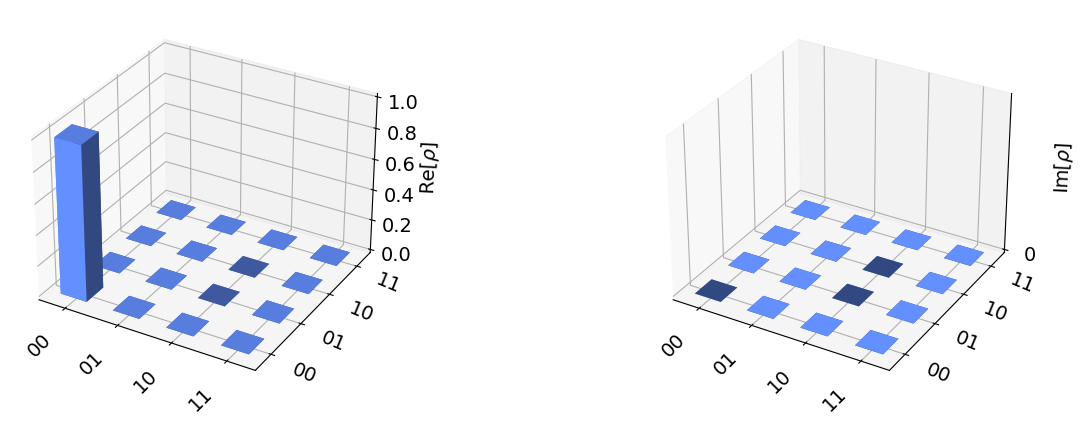

In [77]:
sv = Statevector.from_label("00")
sv.evolve(qcXX)
plot_state_city(sv)

In [129]:
from qiskit import BasicAer
backend_sv = BasicAer.get_backend('statevector_simulator')
sv1 = execute(qcXX, backend_sv).result().get_statevector(qcXX)
print(sv1)

[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


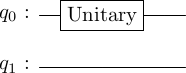

In [127]:
opX = Operator(XGate())
opXX3 = opX.compose(opX)
qcXX3 = QuantumCircuit(2)
qcXX3.append(opXX3, [0])
qcXX3.draw('latex')

In [128]:
from qiskit import BasicAer
backend_sv = BasicAer.get_backend('statevector_simulator')
sv1 = execute(qcXX3, backend_sv).result().get_statevector(qcXX3)
print(sv1)

[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


In [74]:
# linear combination of operators
XX = Operator(Pauli("XX"))
YY = Operator(Pauli("YY"))
ZX = Operator(Pauli("ZX"))
lin_comb = -0.5*(1.0*XX + 1.0*YY + 3.0*ZX)
print(lin_comb)
print(lin_comb.is_unitary())

Operator([[-0. +0.j, -1.5+0.j, -0. +0.j, -0. +0.j],
          [-1.5+0.j, -0. +0.j, -1. +0.j, -0. +0.j],
          [-0. +0.j, -1. +0.j, -0. +0.j,  1.5-0.j],
          [-0. +0.j, -0. +0.j,  1.5-0.j, -0. +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
False


In [75]:
# comparison of operators
opX = Operator(Pauli("X"))
opX == Operator(XGate())

True

In [97]:
# use fidelity
# process_fidelity: fidelity on operators; not depending on global phase, 1.0 -> same; 0.0 -> differ
from qiskit.quantum_info import process_fidelity
from qiskit.extensions import YGate, PhaseGate
opA = Operator(XGate())
opB = np.exp(1j * 0.5) * Operator(XGate())
print(opB)
fidelity_AB = process_fidelity(opA, opB)
print(fidelity_AB)

Operator([[0.        +0.j        , 0.87758256+0.47942554j],
          [0.87758256+0.47942554j, 0.        +0.j        ]],
         input_dims=(2,), output_dims=(2,))
1.0


In [112]:
# state fidelity: states differing
from qiskit import QuantumCircuit
from qiskit.quantum_info import state_fidelity
qc1 = QuantumCircuit(2)
qc1.rx(3*np.pi/4, 0)
print(qc1)

qc2 = QuantumCircuit(2)
qc2.h(0);
qc2.h(1);
qc2.rx(3*np.pi/4, 0)
qc2.h(0);
qc2.h(1);
print(qc2)

from qiskit import BasicAer
backend_sv = BasicAer.get_backend('statevector_simulator')
sv1 = execute(qc1, backend_sv).result().get_statevector(qc1)
sv2 = execute(qc2, backend_sv).result().get_statevector(qc2)

print(state_fidelity(sv1, sv2))

     ┌──────────┐
q_0: ┤ Rx(3π/4) ├
     └──────────┘
q_1: ────────────
                 
     ┌───┐┌──────────┐┌───┐
q_0: ┤ H ├┤ Rx(3π/4) ├┤ H ├
     ├───┤└──┬───┬───┘└───┘
q_1: ┤ H ├───┤ H ├─────────
     └───┘   └───┘         
0.1464466094067263


## 6. Return the experiment results

In [4]:
# build sample circuit
from qiskit import QuantumCircuit
qc_exp = QuantumCircuit(2,2)
qc_exp.h(0)
qc_exp.cx(0,1)
qc_exp.measure([0,1], [0,1])

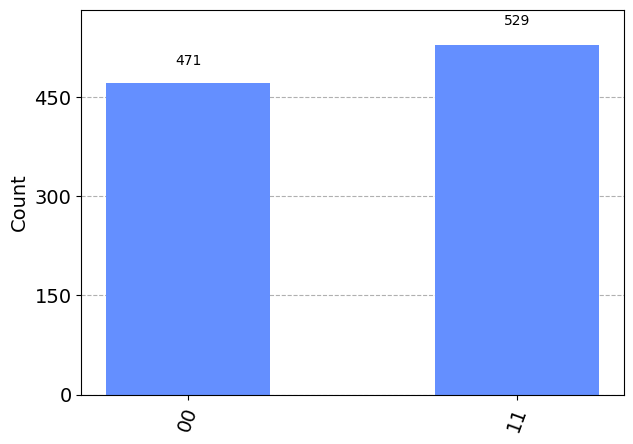

In [6]:
# understand histogram data of experiment
from qiskit import BasicAer, execute
from qiskit.visualization import plot_histogram
# run circuit
backend_qasm = BasicAer.get_backend('qasm_simulator')
job = execute(qc_exp, backend_qasm, shots=1000)
result = job.result()
plot_histogram(result.get_counts())

In [10]:
# understand statevector
backend_sv = BasicAer.get_backend('statevector_simulator')
job = execute(qc_exp, backend_sv)
result = job.result()
print(result.get_statevector())

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [34]:
#understand unitary
# remove measurements, initializations, resets as they are not unitary
import numpy as np
from qiskit.visualization import array_to_latex
qc_exp2 = QuantumCircuit(2)
qc_exp2.h(1)
qc_exp2.cx(1,0)
#qc_exp.remove_final_measurements()
backend_u = BasicAer.get_backend('unitary_simulator')
job = execute(qc_exp2, backend_u)
result = job.result()
unitary = result.get_unitary()
print(unitary)

nice_unitary = np.transpose((np.sqrt(2)*unitary))

array_to_latex(unitary, prefix="\\text{Circuit = } ")
array_to_latex(nice_unitary, prefix="\\text{Circuit_nice = $1/\sqrt{2}*$ } ")

[[ 0.70710678+0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678-8.65956056e-17j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.70710678+0.00000000e+00j
   0.        +0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.70710678+0.00000000e+00j
   0.        +0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j  0.        +0.00000000e+00j
  -0.70710678+8.65956056e-17j  0.        +0.00000000e+00j]]


<IPython.core.display.Latex object>

## 7. Use qiskit tools

In [67]:
# Monitor the status of job instance
# create job
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1], [0,1])

In [70]:
#execute on backend
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider()
provider.backends()

ibmqfactory.load_account:WARNING:2023-06-05 14:40:37,619: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

In [73]:
from qiskit import transpile
backend_belem = provider.get_backend("ibmq_belem")
tqc = transpile(qc, backend_belem)

job = backend_belem.run(tqc)
print(job.status())

JobStatus.QUEUED


In [80]:
#use jobwatcher
import qiskit.tools.jupyter
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [83]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job is queued (None)

KeyboardInterrupt: 

In [ ]:
# job.result() -> blocking call
# job.wait_for_final_state() -> done, error, cancelled

## 8. Display and use system information

In [81]:
# Perform operations about the qiskit version
import qiskit.tools.jupyter

%qiskit_version_table

In [84]:
print(qiskit.__qiskit_version__)

{'qiskit-terra': '0.24.0', 'qiskit-aer': '0.12.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit': '0.43.0', 'qiskit-nature': '0.5.0', 'qiskit-finance': None, 'qiskit-optimization': '0.5.0', 'qiskit-machine-learning': '0.6.1'}


In [89]:
pip show qiskit

Name: qiskit
Version: 0.43.0
Summary: Software for developing quantum computing programs
Home-page: https://qiskit.org/
Author: Qiskit Development Team
Author-email: hello@qiskit.org
License: Apache 2.0
Location: c:\users\maussner\.conda\envs\qiskit_env\lib\site-packages
Requires: qiskit-aer, qiskit-ibmq-provider, qiskit-terra
Required-by: qc-grader
Note: you may need to restart the kernel to use updated packages.


In [85]:
# least busy
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(simulator=False))
print("Least busy backend:", backend.name())

Least busy backend: ibm_nairobi


In [86]:
# use information gained from %qiskit_backend_overview
import qiskit.tools.jupyter

%qiskit_backend_overview

## 9. Construct visualizations

In [14]:
from qiskit import QuantumCircuit
qc_bell = QuantumCircuit(2,2)
qc_bell.h(0)
qc_bell.cx(0,1)
qc_bell.barrier()
qc_bell.measure([0,1], [0,1])

qc_bell2 = QuantumCircuit(2,2)
qc_bell2.h(0)
qc_bell2.x(1)
qc_bell2.cx(0,1)
qc_bell2.barrier([0,1])
qc_bell2.measure([0,1], [0,1])

In [5]:
# Draw a circuit
print(qc_bell)

     ┌───┐      ░ ┌─┐   
q_0: ┤ H ├──■───░─┤M├───
     └───┘┌─┴─┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├─░──╫─┤M├
          └───┘ ░  ║ └╥┘
c: 2/══════════════╩══╩═
                   0  1 


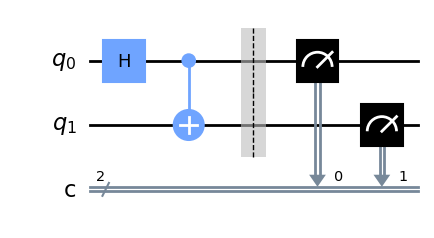

In [6]:
qc_bell.draw('mpl')

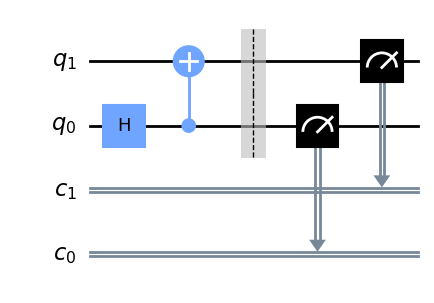

In [8]:
# draw with bits in reverse order
qc_bell.draw('mpl', reverse_bits=True)

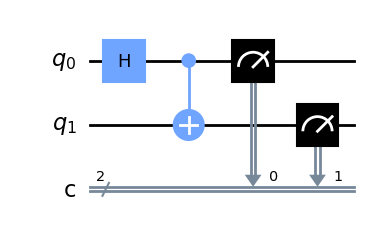

In [9]:
# draw without barriers
qc_bell.draw('mpl', plot_barriers=False)

In [12]:
# Plot a histogram of data
from qiskit import execute, BasicAer
from qiskit.visualization import plot_histogram
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc_bell, backend)
results = job.result()

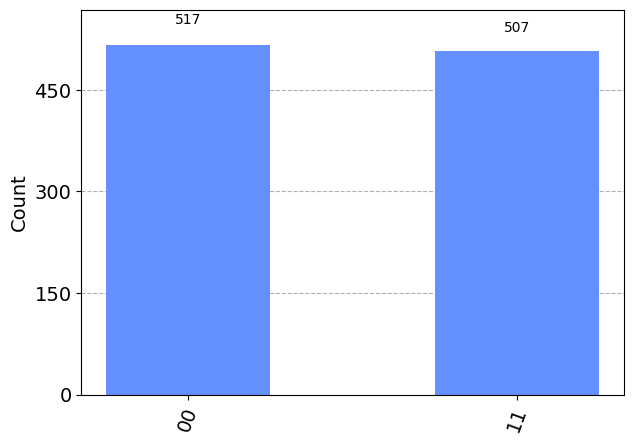

In [13]:
plot_histogram(results.get_counts())

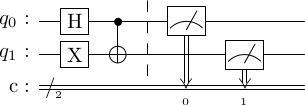

In [15]:
# get vector of bell and bell2
qc_bell2.draw('latex')

In [24]:
# run bell and bell2 and get statevector
from qiskit import BasicAer
backend = BasicAer.get_backend('statevector_simulator')
job1 = execute(qc_bell, backend)
job2 = execute(qc_bell2, backend)
sv1 = job1.result().get_statevector()
sv2 = job2.result().get_statevector()
print(sv1)
print(sv2)

[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


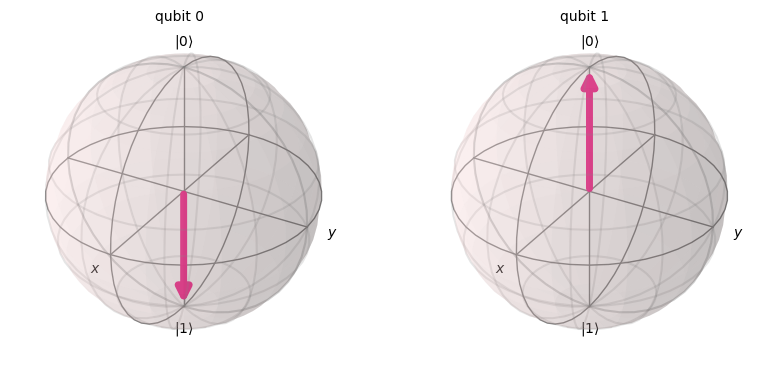

In [43]:
# Plot a Bloch multivector
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(sv2)

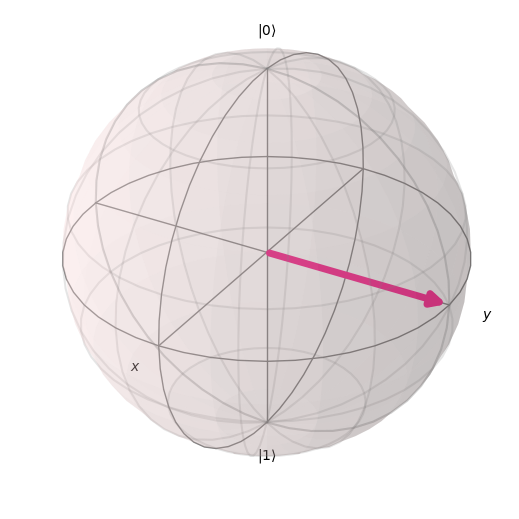

In [20]:
# Plot a Bloch vector
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([0,1,0]) # only y

[0.9999999999999999, 1.5707963267948966, 0.0]


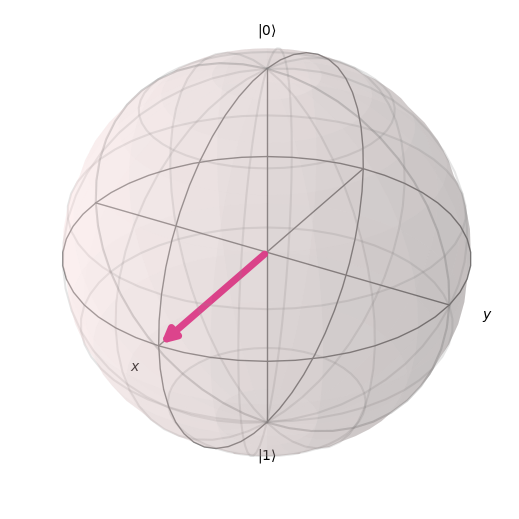

In [36]:
import numpy as np
def get_spherical_coordinates(statevector):
    # Convert to polar form:
    r0 = np.abs(statevector[0])
    ϕ0 = np.angle(statevector[0])

    r1 = np.abs(statevector[1])
    ϕ1 = np.angle(statevector[1])

    # Calculate the coordinates:
    r = np.sqrt(r0 ** 2 + r1 ** 2)
    θ = 2 * np.arccos(r0 / r)
    ϕ = ϕ1 - ϕ0
    return [r, θ, ϕ]

# Example:
Ψ = [complex(1 / np.sqrt(2), 0), complex(1 / np.sqrt(2), 0)]
print(get_spherical_coordinates(Ψ))
plot_bloch_vector(get_spherical_coordinates(Ψ), coord_type = 'spherical')

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


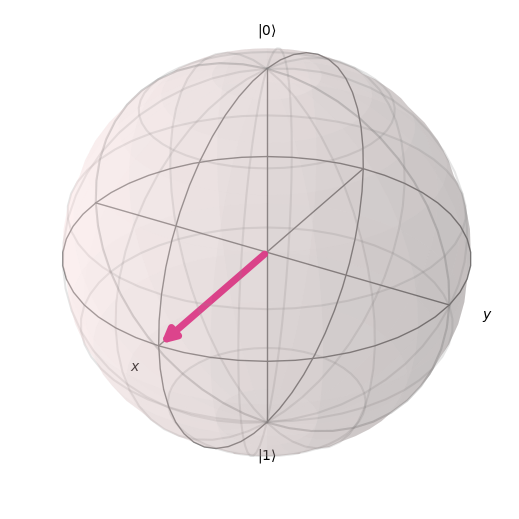

In [35]:
from qiskit.quantum_info import Statevector
statevector = Statevector.from_label("+")
print(statevector)
plot_bloch_vector([1, np.pi/2 ,0], coord_type='spherical')

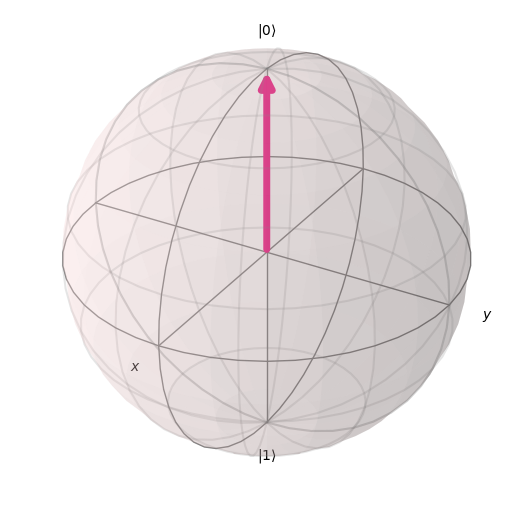

In [58]:
plot_bloch_vector([1,0,np.pi/2], coord_type='spherical')

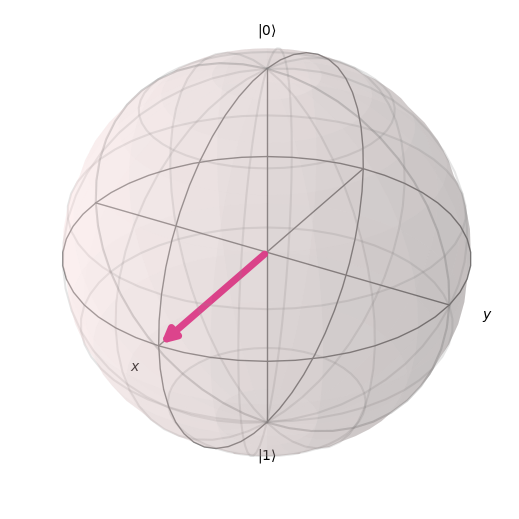

In [37]:
plot_bloch_vector([1,0,0])

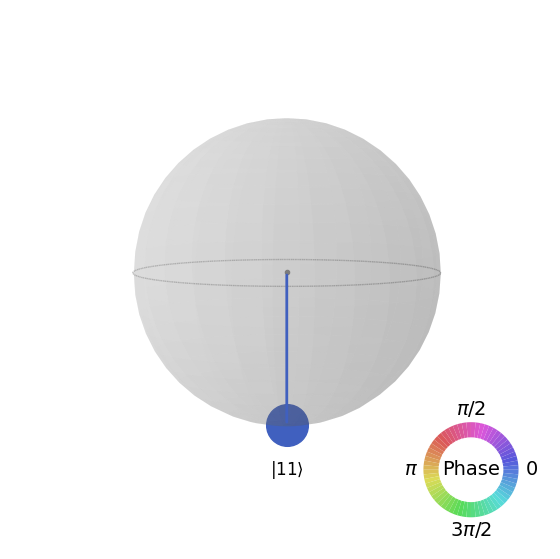

In [21]:
# Plot a QSphere
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(sv1)

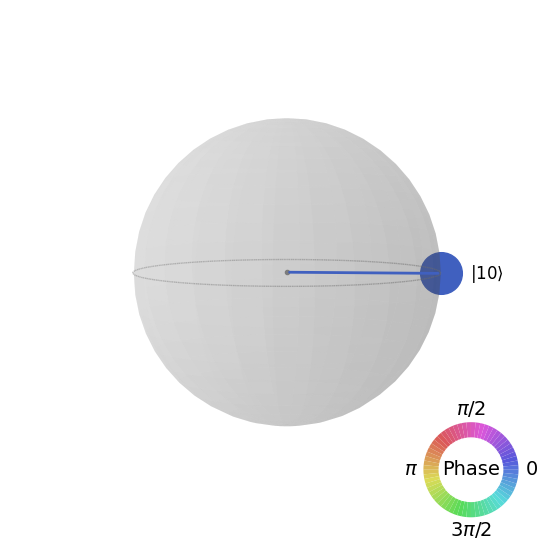

In [22]:
plot_state_qsphere(sv2)

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


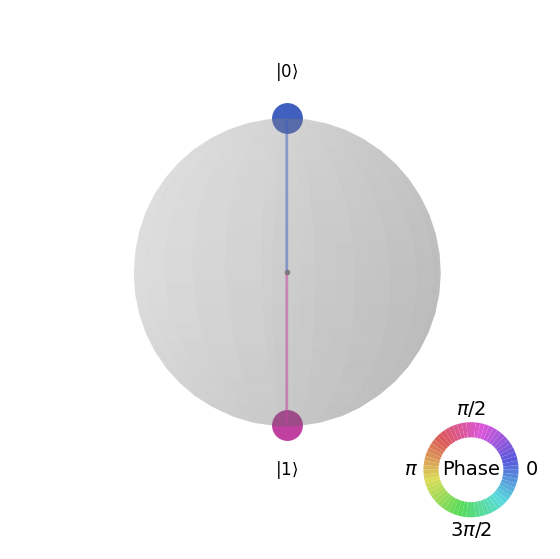

In [44]:
state = Statevector.from_label("r")
print(state)
plot_state_qsphere(state)

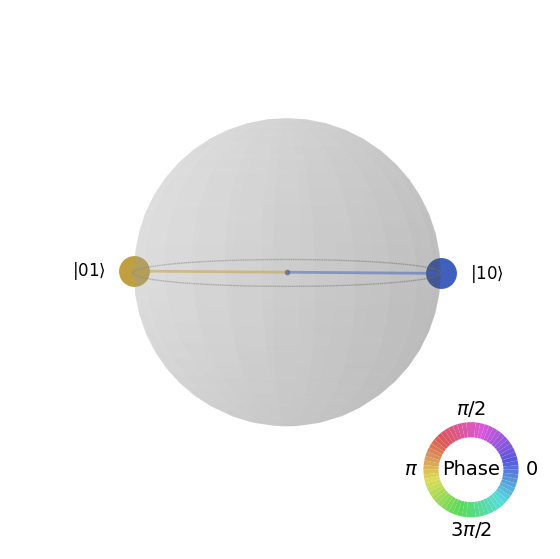

In [45]:
# plot bellstate in qsphere
state_bell = [0,-1/np.sqrt(2), 1/np.sqrt(2), 0]
sv_bell = Statevector(state_bell)
plot_state_qsphere(sv_bell)

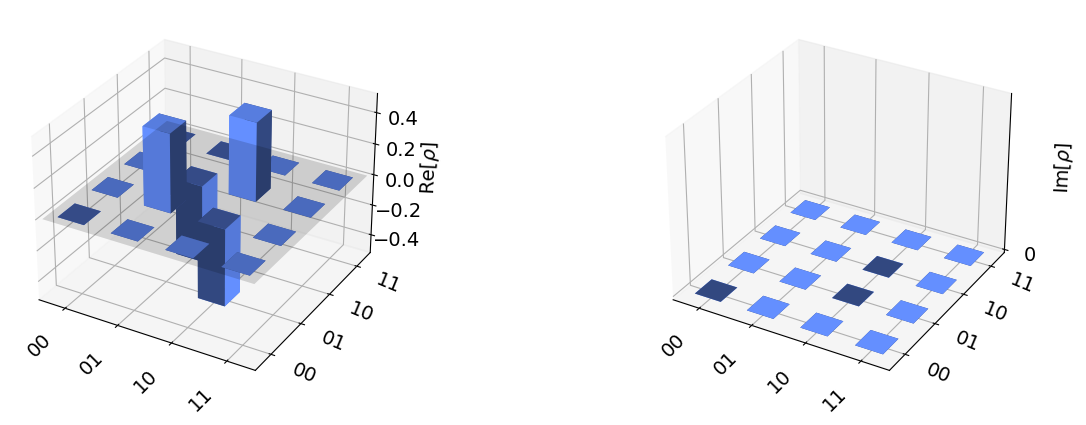

In [46]:
# plot state city
from qiskit.visualization import plot_state_city
plot_state_city(sv_bell)

DensityMatrix([[0.+0.j, 0.+0.j],
               [0.+0.j, 1.+0.j]],
              dims=(2,))
DensityMatrix([[0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j, 0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j, 0.5+0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j]],
              dims=(2, 2))


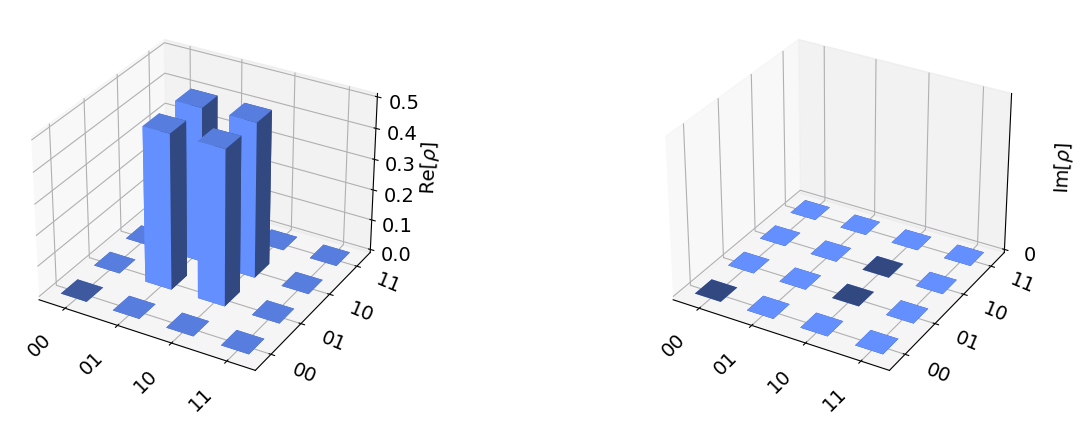

In [54]:
# Plot a density matrix
from qiskit.quantum_info import DensityMatrix
from qiskit.extensions import XGate
d = DensityMatrix.from_instruction(XGate())
print(d)

d2 = DensityMatrix(qc_bell2)
print(d2)
plot_state_city(d2)

In [48]:
# plot error rates
from qiskit.visualization import plot_error_map
from qiskit import IBMQ
IBMQ.load_account()
IBMQ.get_provider().backends()

ibmqfactory.load_account:WARNING:2023-06-15 08:13:46,701: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

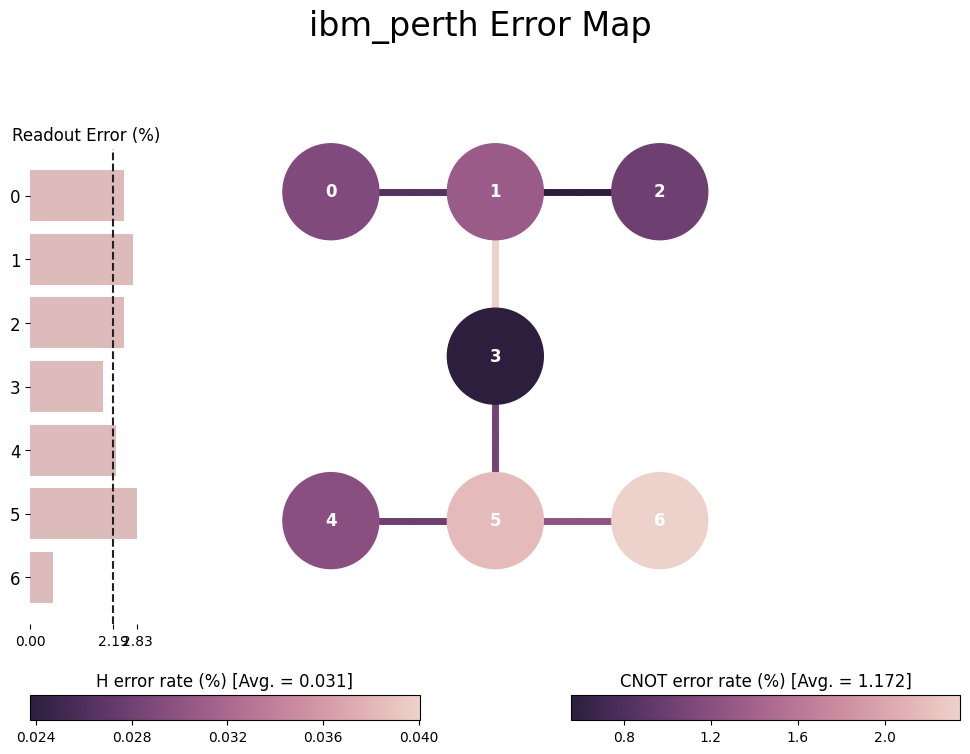

In [49]:
plot_error_map(IBMQ.get_provider().get_backend('ibm_perth'))

In [59]:
# T1 error rate is poisson time constant for bitflip 1->0
# T2 error rate is poisson time constant for phaseflip -> "+" -> "-"
# both are the decoherence times

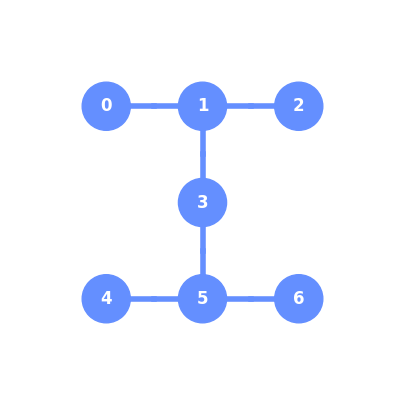

In [50]:
# Plot a gate map -> coupling map
from qiskit.visualization import plot_gate_map
plot_gate_map(IBMQ.get_provider().get_backend('ibm_perth'))

## 10. Access aer provider

In [6]:
#imports
from qiskit import Aer, transpile
from qiskit.circuit import QuantumCircuit

In [7]:
# display available backends
print(Aer.backends())

[AerSimulator('aer_simulator'), AerSimulator('aer_simulator_statevector'), AerSimulator('aer_simulator_density_matrix'), AerSimulator('aer_simulator_stabilizer'), AerSimulator('aer_simulator_matrix_product_state'), AerSimulator('aer_simulator_extended_stabilizer'), AerSimulator('aer_simulator_unitary'), AerSimulator('aer_simulator_superop'), QasmSimulator('qasm_simulator'), StatevectorSimulator('statevector_simulator'), UnitarySimulator('unitary_simulator'), PulseSimulator('pulse_simulator')]


In [24]:
#create circuit
qc_aer = QuantumCircuit(2,2)
qc_aer.h(0)
qc_aer.cx(0,1)
qc_aer.measure([0,1], [0,1])

In [25]:
# run on simulator statevector
backend_statevector = Aer.get_backend("statevector_simulator")
tqc_aer = transpile(qc_aer, backend_statevector)
job = backend_statevector.run(tqc_aer)
result = job.result()
#print(result.get_counts(qc_aer))
print(result.get_statevector(tqc_aer, 4))

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


In [26]:
# run on qasm_simulator
backend_qasm = Aer.get_backend("qasm_simulator")
tqc_aer = transpile(qc_aer, backend_qasm)
job = backend_qasm.run(tqc_aer)
result = job.result()
print(result.get_counts())

{'11': 502, '00': 522}


In [37]:
#run on unitary simulator
backend_unitary = Aer.get_backend("unitary_simulator")
qc_aer.remove_final_measurements()
tqc_aer = transpile(qc_aer, backend_unitary)
job = backend_unitary.run(tqc_aer)
result = job.result()
print(result.get_unitary(tqc_aer, 4))

Simulation failed and returned the following error message:
ERROR: Failed to load circuits: Duplicate key "unitary" in save instruction.


QiskitError: 'Data for experiment "circuit-135" could not be found.'